In [12]:
import c3d
import os
import itertools
import matplotlib.pyplot as plt

In [13]:
key_name = 'p7s1'
sample_c3d_path = f'gait3d\\Sequences\\{key_name}\\MoCap\\{key_name}.c3d'
markers_number = 39
frames_per_sec = 100

In [14]:
import json
from scripts.parsers import parse_sequences

file_path = 'gait3d\\ListOfSequences.txt'
sequences = parse_sequences(file_path)
print(json.dumps(sequences, indent=4))

{
    "p1s1": {
        "start_frame": 195,
        "number_of_frames": 135,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p1s2": {
        "start_frame": 150,
        "number_of_frames": 120,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p1s3": {
        "start_frame": 435,
        "number_of_frames": 130,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p1s4": {
        "start_frame": 350,
        "number_of_frames": 110,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p2s1": {
        "start_frame": 130,
        "number_of_frames": 155,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p2s2": {
        "start_frame": 110,
        "number_of_frames": 120,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p2s3": {
        "start_frame": 330,
        "number_of_frames": 125,
        "frame_offset": 0,
        "MoCap_data": true
    },
    "p2s4": {
        "start_frame": 285,
    

In [15]:
sequences[key_name]

{'start_frame': 90,
 'number_of_frames': 120,
 'frame_offset': 0,
 'MoCap_data': True}

In [16]:
with open(sample_c3d_path, 'rb') as handle:
    reader = c3d.Reader(handle)
    frame = next(itertools.islice(reader.read_frames(), sequences[key_name]['start_frame'], None))
    print(frame[1][:markers_number])

[[ -58.473167   306.72556   1590.481        0.           0.       ]
 [-195.96028    318.9733    1568.0076       0.           0.       ]
 [ -29.970314   423.40414   1552.9572       0.           0.       ]
 [-193.02731    435.663     1542.8889       0.           0.       ]
 [-114.39617    500.86237   1397.1564       0.           0.       ]
 [ -94.706436   553.14795   1116.0562       0.           0.       ]
 [-111.00772    321.75253   1261.6752       0.           0.       ]
 [-114.60024    288.152     1125.5502       0.           0.       ]
 [-166.073      556.1568    1284.5372       0.           0.       ]
 [  66.259384   431.33176   1352.3319       0.           0.       ]
 [ 153.15312    469.89798   1140.2203       0.           0.       ]
 [ 162.0769     470.1577    1014.81445      0.           0.       ]
 [ 182.88127    443.249      904.5911       0.           0.       ]
 [ 148.86696    344.37012    811.09595      0.           0.       ]
 [ 188.61516    403.23502    794.83203      0.  

In [17]:
print(f"{type(frame[1]) = }")
print(f"{frame[1].shape = }")
print(f"{frame[1][:5] = }")

type(frame[1]) = <class 'numpy.ndarray'>
frame[1].shape = (191, 5)
frame[1][:5] = array([[ -58.473167,  306.72556 , 1590.481   ,    0.      ,    0.      ],
       [-195.96028 ,  318.9733  , 1568.0076  ,    0.      ,    0.      ],
       [ -29.970314,  423.40414 , 1552.9572  ,    0.      ,    0.      ],
       [-193.02731 ,  435.663   , 1542.8889  ,    0.      ,    0.      ],
       [-114.39617 ,  500.86237 , 1397.1564  ,    0.      ,    0.      ]],
      dtype=float32)


In [18]:
frame[1].shape

(191, 5)

In [19]:
frame[1]

array([[-5.84731674e+01,  3.06725555e+02,  1.59048096e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.95960281e+02,  3.18973297e+02,  1.56800757e+03,
         0.00000000e+00,  0.00000000e+00],
       [-2.99703140e+01,  4.23404144e+02,  1.55295715e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.93027313e+02,  4.35662994e+02,  1.54288892e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.14396172e+02,  5.00862366e+02,  1.39715637e+03,
         0.00000000e+00,  0.00000000e+00],
       [-9.47064362e+01,  5.53147949e+02,  1.11605615e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.11007721e+02,  3.21752533e+02,  1.26167517e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.14600243e+02,  2.88152008e+02,  1.12555017e+03,
         0.00000000e+00,  0.00000000e+00],
       [-1.66072998e+02,  5.56156799e+02,  1.28453723e+03,
         0.00000000e+00,  0.00000000e+00],
       [ 6.62593842e+01,  4.31331757e+02,  1.35233191e+03,
         0.00000000e+00

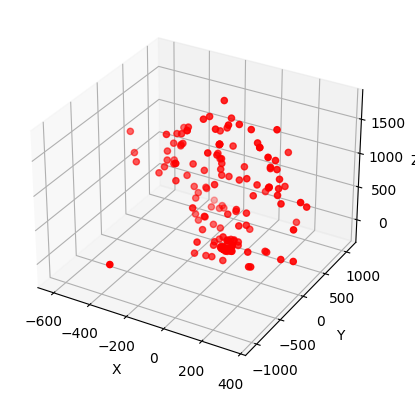

In [28]:
x = frame[1][:, 0]
y = frame[1][:, 1]
z = frame[1][:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [29]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color='blue'))])

fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                    title='Interactive 3D Scatter Plot')

fig.show()

In [11]:
with open(sample_c3d_path, 'rb') as handle:  
    reader = c3d.Reader(handle)
    frame_num = sum([1 for _ in reader.read_frames()])
    print(f"{frame_num = }")
    
    for frame in reader.read_frames():
        print(f"{frame[0]} {frame[1].shape} {frame[2].shape}")

C:\Users\Miko7\miniconda3\envs\tf\lib\site-packages\c3d\c3d.py:1219: UserWarning:

No analog data found in file.



frame_num = 3104
1 (191, 5) (0,)
2 (191, 5) (0,)
3 (191, 5) (0,)
4 (191, 5) (0,)
5 (191, 5) (0,)
6 (191, 5) (0,)
7 (191, 5) (0,)
8 (191, 5) (0,)
9 (191, 5) (0,)
10 (191, 5) (0,)
11 (191, 5) (0,)
12 (191, 5) (0,)
13 (191, 5) (0,)
14 (191, 5) (0,)
15 (191, 5) (0,)
16 (191, 5) (0,)
17 (191, 5) (0,)
18 (191, 5) (0,)
19 (191, 5) (0,)
20 (191, 5) (0,)
21 (191, 5) (0,)
22 (191, 5) (0,)
23 (191, 5) (0,)
24 (191, 5) (0,)
25 (191, 5) (0,)
26 (191, 5) (0,)
27 (191, 5) (0,)
28 (191, 5) (0,)
29 (191, 5) (0,)
30 (191, 5) (0,)
31 (191, 5) (0,)
32 (191, 5) (0,)
33 (191, 5) (0,)
34 (191, 5) (0,)
35 (191, 5) (0,)
36 (191, 5) (0,)
37 (191, 5) (0,)
38 (191, 5) (0,)
39 (191, 5) (0,)
40 (191, 5) (0,)
41 (191, 5) (0,)
42 (191, 5) (0,)
43 (191, 5) (0,)
44 (191, 5) (0,)
45 (191, 5) (0,)
46 (191, 5) (0,)
47 (191, 5) (0,)
48 (191, 5) (0,)
49 (191, 5) (0,)
50 (191, 5) (0,)
51 (191, 5) (0,)
52 (191, 5) (0,)
53 (191, 5) (0,)
54 (191, 5) (0,)
55 (191, 5) (0,)
56 (191, 5) (0,)
57 (191, 5) (0,)
58 (191, 5) (0,)
59 (19